In [1]:
import numpy as np

## Fully-Connected Layer

### Initialize weights and bias

In [2]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

### Forward pass

In [3]:
z = W @ x + b
y_pred = 1 / (1 + np.exp(-z))

print("Output (y):\n", y_pred)

Output (y):
 [[0.73105858]]


### Calculate loss

In [4]:
# Mean squared error
loss = np.mean((y_true - y_pred) ** 2)

print("Loss (L):\n", loss)

Loss (L):
 0.07232948812851325


### Backward pass

In [5]:
dL_dy = - 2 * (y_true - y_pred)
dy_dz = y_pred * (1 - y_pred)  # sigmoid derivative
dL_dz = dL_dy * dy_dz
dL_dW = dL_dz @ x.T
dL_db = dL_dz
dL_dx = W.T @ dL_dz

print("Gradient wrt weights (dL/dW):\n", dL_dW)
print("\nGradient wrt bias (dL/db):\n", dL_db)
print("\nGradient wrt input (dL/dx):\n", dL_dx)

Gradient wrt weights (dL/dW):
 [[-0.10575419 -0.21150837]]

Gradient wrt bias (dL/db):
 [[-0.10575419]]

Gradient wrt input (dL/dx):
 [[-0.01057542]
 [-0.02115084]]


### Update the weights and bias using the gradient

In [6]:
lr = 0.01
W -= lr * dL_dW
b -= lr * dL_db

print("Updated weights (W):\n", W)
print("Updated bias (b):\n", b)

Updated weights (W):
 [[0.10105754 0.20211508]]
Updated bias (b):
 [[0.50105754]]


### Training loop

In [7]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

lr = 0.01

# Training loop
for epoch in range(5):
    # Forward pass
    z = x @ W + b
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid activation function
    
    # Loss (mean-squared error)
    loss = np.mean((y_true - y_pred) ** 2)

    # Backward pass
    dL_dy = - 2 * (y_true - y_pred)  # Mean-squared error derivation
    dy_dz = y_pred * (1 - y_pred)  # Sigmoid derivation
    dL_dz = dL_dy * dy_dz

    dL_dW = x.T @ dL_dz
    dL_db = np.sum(dL_dz)

    # Update step
    W -= lr * dL_dW
    b -= lr * dL_db
    
    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")
    print("Updated W:", W, " Updated b:", b)

Epoch 1, Loss = 0.1073
Updated W: [[0.10456405 0.20384734]]  Updated b: [[0.50575205]]
Epoch 2, Loss = 0.1056
Updated W: [[0.10906857 0.20764446]]  Updated b: [[0.51143431]]
Epoch 3, Loss = 0.1040
Updated W: [[0.11351457 0.21139234]]  Updated b: [[0.51704801]]
Epoch 4, Loss = 0.1023
Updated W: [[0.11790308 0.21509192]]  Updated b: [[0.52259436]]
Epoch 5, Loss = 0.1007
Updated W: [[0.12223509 0.21874413]]  Updated b: [[0.52807453]]


## Fully-Connected Network (FCN)

### Example: FCN for point classification

In [8]:
# pip install nnfs
import nnfs
from nnfs.datasets import spiral_data

# pip install matplotlib
import matplotlib.pyplot as plt

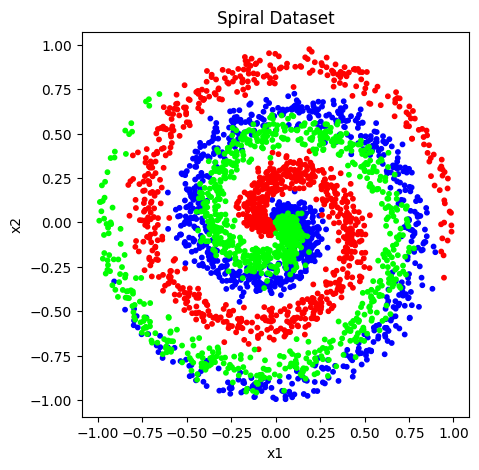

In [9]:
x_train, y_train = spiral_data(samples=1000, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [10]:
# pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
# Convert data to tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

In [12]:
# FCN model (3 hidden layers)
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=3),
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the weights and biases
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")

Epoch 1, Loss = 1.1023
Epoch 2, Loss = 1.0866
Epoch 3, Loss = 1.0853
Epoch 4, Loss = 1.0752
Epoch 5, Loss = 1.0687
Epoch 6, Loss = 1.0699
Epoch 7, Loss = 1.0655
Epoch 8, Loss = 1.0597
Epoch 9, Loss = 1.0562
Epoch 10, Loss = 1.0530
Epoch 11, Loss = 1.0484
Epoch 12, Loss = 1.0426
Epoch 13, Loss = 1.0370
Epoch 14, Loss = 1.0319
Epoch 15, Loss = 1.0265
Epoch 16, Loss = 1.0205
Epoch 17, Loss = 1.0138
Epoch 18, Loss = 1.0068
Epoch 19, Loss = 0.9994
Epoch 20, Loss = 0.9916
Epoch 21, Loss = 0.9836
Epoch 22, Loss = 0.9754
Epoch 23, Loss = 0.9673
Epoch 24, Loss = 0.9594
Epoch 25, Loss = 0.9513
Epoch 26, Loss = 0.9432
Epoch 27, Loss = 0.9352
Epoch 28, Loss = 0.9267
Epoch 29, Loss = 0.9176
Epoch 30, Loss = 0.9080
Epoch 31, Loss = 0.8979
Epoch 32, Loss = 0.8868
Epoch 33, Loss = 0.8750
Epoch 34, Loss = 0.8626
Epoch 35, Loss = 0.8497
Epoch 36, Loss = 0.8406
Epoch 37, Loss = 0.8403
Epoch 38, Loss = 0.8185
Epoch 39, Loss = 0.8028
Epoch 40, Loss = 0.7983
Epoch 41, Loss = 0.7737
Epoch 42, Loss = 0.7717
E

### Test the model

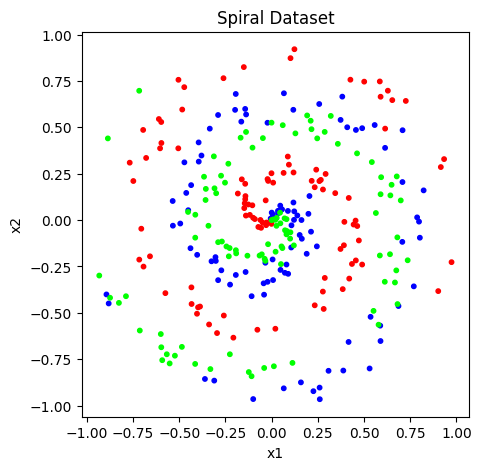

In [13]:
x_test, y_test = spiral_data(samples=100, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [14]:
# Convert data to tensors
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

with torch.no_grad():
    y_pred = model(x_test)
    pred_test = torch.argmax(y_pred, axis=1)
    test_acc = (pred_test == y_test).float().mean()

print(f"\nFinal Test Accuracy: {test_acc:.3f}")


Final Test Accuracy: 0.860


### Example: FCN for image classification

In [15]:
from torchvision import datasets, transforms

In [ ]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [17]:
image, label = train_data[0]

print("Image shape:", image.shape)
print("Label:", label)


Image shape: torch.Size([1, 28, 28])
Label: 5


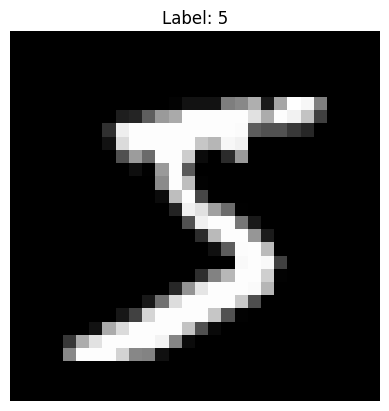

In [18]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)

        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.2758
Epoch 2, Loss = 0.1879
Epoch 3, Loss = 0.1697
Epoch 4, Loss = 0.1638
Epoch 5, Loss = 0.1492
Epoch 6, Loss = 0.1377
Epoch 7, Loss = 0.1360
Epoch 8, Loss = 0.1264
Epoch 9, Loss = 0.1296
Epoch 10, Loss = 0.1230


In [22]:
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=False)

correct = 0
total = 0
test_loss = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = (correct / total) * 100

print(f"\nFinal Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 95.8100


## Convolutional Layer

### Initialize input, weights and bias

In [23]:
X = np.random.randint(0, 255, (28, 28))

W = np.array([
    [0.2, -0.5],
    [0.3, 0.1]
])
b = 0.0

### Forward pass

In [24]:
# Convolutional layer
kernel_size = 2
padding = 0
stride = 1

# Calculate the output size
H_out = (X.shape[0] + 2 * padding - kernel_size) // stride + 1
W_out = (X.shape[1] + 2 * padding - kernel_size) // stride + 1

# Do the convolution operation
Z = np.zeros((H_out, W_out))
for i in range(0, H_out, stride):
    for j in range(0, W_out, stride):
        conv_region = X[i:i+kernel_size, j:j+kernel_size]
        Z[i, j] = np.sum(W * conv_region) + b

print("Output (Z):\n", Z)
print("\nShape after convolutional layer:", Z.shape)

Output (Z):
 [[-4.510e+01  3.600e+00  2.570e+01  3.550e+01 -5.460e+01 -1.790e+01
   1.208e+02  3.380e+01  6.910e+01  7.400e+00 -3.960e+01 -3.090e+01
   2.990e+01 -5.700e+01  8.100e+00 -9.200e+00  7.960e+01 -3.480e+01
  -1.300e+01  5.610e+01  2.800e+00  7.240e+01  4.200e+01  2.290e+01
  -2.470e+01  8.000e+01  7.750e+01]
 [ 2.290e+01 -2.040e+01 -1.550e+01  8.850e+01  1.820e+01 -8.410e+01
  -6.070e+01 -4.210e+01  1.400e+00  8.850e+01 -3.770e+01 -1.440e+01
   5.360e+01 -7.360e+01  9.100e+01 -9.980e+01  4.820e+01 -5.250e+01
   1.008e+02 -1.610e+01  3.920e+01 -1.820e+01  2.610e+01 -3.190e+01
  -1.780e+01 -3.080e+01  5.750e+01]
 [-5.350e+01  3.400e+00  2.800e+01 -6.100e+01  9.800e+01  6.140e+01
   1.140e+01  4.470e+01 -3.710e+01  6.830e+01  3.990e+01 -3.000e+01
   4.590e+01 -3.140e+01  5.530e+01  7.600e+01  8.700e+00 -2.770e+01
  -4.440e+01  5.850e+01 -5.290e+01  2.070e+01  1.550e+01  8.970e+01
   9.600e+00 -7.300e+00  4.290e+01]
 [ 5.350e+01 -2.750e+01  3.870e+01 -8.550e+01 -1.340e+01 -2.940

In [25]:
# Activation function (ReLU)
A = np.maximum(0, Z)
print("Output after ReLU (Z):\n", A)
print("\nShape after ReLU:", A.shape)

Output after ReLU (Z):
 [[0.000e+00 3.600e+00 2.570e+01 3.550e+01 0.000e+00 0.000e+00 1.208e+02
  3.380e+01 6.910e+01 7.400e+00 0.000e+00 0.000e+00 2.990e+01 0.000e+00
  8.100e+00 0.000e+00 7.960e+01 0.000e+00 0.000e+00 5.610e+01 2.800e+00
  7.240e+01 4.200e+01 2.290e+01 0.000e+00 8.000e+01 7.750e+01]
 [2.290e+01 0.000e+00 0.000e+00 8.850e+01 1.820e+01 0.000e+00 0.000e+00
  0.000e+00 1.400e+00 8.850e+01 0.000e+00 0.000e+00 5.360e+01 0.000e+00
  9.100e+01 0.000e+00 4.820e+01 0.000e+00 1.008e+02 0.000e+00 3.920e+01
  0.000e+00 2.610e+01 0.000e+00 0.000e+00 0.000e+00 5.750e+01]
 [0.000e+00 3.400e+00 2.800e+01 0.000e+00 9.800e+01 6.140e+01 1.140e+01
  4.470e+01 0.000e+00 6.830e+01 3.990e+01 0.000e+00 4.590e+01 0.000e+00
  5.530e+01 7.600e+01 8.700e+00 0.000e+00 0.000e+00 5.850e+01 0.000e+00
  2.070e+01 1.550e+01 8.970e+01 9.600e+00 0.000e+00 4.290e+01]
 [5.350e+01 0.000e+00 3.870e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 3.750e+01 1.210e+01 1.069e+02 0.000e+00 4.430e+01 1.750

In [26]:
# MaxPool 2x2 layer
pool_size = 2
pool_stride = 2

# Calculate the output size
H_out = (A.shape[0] - pool_size) // pool_stride + 1
W_out = (A.shape[1] - pool_size) // pool_stride + 1

# Do the pooling operation
P = np.zeros((H_out, W_out))
for i in range(0, H_out, pool_stride):
    for j in range(0, W_out, pool_stride):
        pool_region = A[i:i+pool_size, j:j+pool_size]
        P[i, j] = np.max(pool_region)
        
print("Output after max-pooling layer (P):\n", P)
print("\nShape after max-pooling layer:", P.shape)

Output after max-pooling layer (P):
 [[ 22.9   0.   88.5   0.   18.2   0.  120.8   0.   88.5   0.    0.    0.
   53.6]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 53.5   0.   38.7   0.   98.    0.   44.7   0.   68.3   0.  106.9   0.
   45.9]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 82.5   0.   72.9   0.   79.2   0.   48.7   0.   78.8   0.   49.7   0.
   47.7]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [ 39.9   0.   18.8   0.   49.7   0.   80.5   0.  132.8   0.    1.7   0.
   90.2]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [120.5   0.   78.5   0.   63.6   0.   25.3   0.  102.9   0.   88.3   0.
   43.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [117.    0.   38.6   0.   50.2   0.   89.    0.   70.5   0.   77.5   0.
   92.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 

### Backward pass?

In [27]:
# Write your code for convolutional layer's backward pass here

### CNN for image classification


In [28]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [29]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flattening
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.1119
Epoch 2, Loss = 0.0576
Epoch 3, Loss = 0.0496
Epoch 4, Loss = 0.0438
Epoch 5, Loss = 0.0454
Epoch 6, Loss = 0.0408
Epoch 7, Loss = 0.0444
Epoch 8, Loss = 0.0399
Epoch 9, Loss = 0.0412
Epoch 10, Loss = 0.0409


In [31]:
test_data = datasets.MNIST(root="./data", train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=False)

correct = 0
total = 0
test_loss = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = (correct / total) * 100

print(f"\nFinal Test Accuracy: {test_acc:.3f}")


Final Test Accuracy: 98.290


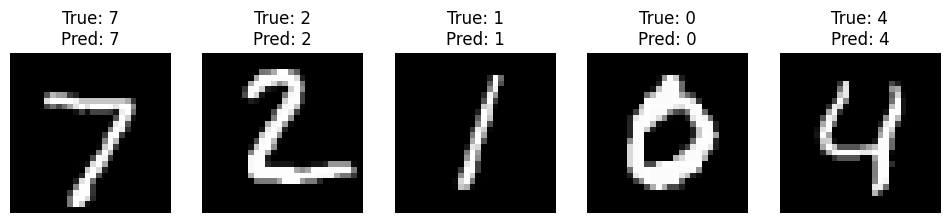

In [32]:
model.eval()

# Get the first 5 test images and labels
images, labels = next(iter(test_loader))

images = images.to(device)
labels = labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
    plt.axis("off")

plt.show()